<a href="https://colab.research.google.com/github/azelia-choi/ITB2022/blob/main/Bank_Churn_EDA_gaeun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 원본데이터가 여기인데 (https://www.superdatascience.com/pages/deep-learning) 캐글에서 찾았다고 하니까 너무 코드 복붙이라고 생각하실까봐 (...) 발표할 때 여기에서 찾았다고 이야기 할까요 ??

#Part1. 데이터 및 라이브러리 불러오기💻

In [1]:
#맥북 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (19.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/churn.csv")

In [3]:
!pip install mglearn 
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=258044a698e695f158d296a276e4b6e73b8e8313224c09b756a567f73058da17
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 5.4 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [4]:
#필요한 라이브러리 import
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats
import mglearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [5]:
sns.set_theme(style="ticks", palette="pastel")

In [6]:
plt.rc('font', family='NanumBarunGothic') 

#Part2. 데이터 탐색 💁

## Churn : 가입자 이탈률


*   가입자 이탈률 분석은 고객 이탈 가능성이 가장  높은 사람을 예측하는 과정
- 기존 고객을 유지하는 것이 새로운 고객을 발굴하는 것보다 쉽고 비용도 적게 들음 (관련 자료 더 찾아봐야 할 듯) 

*   카드사 및 은행권에서는 고객 이탈률이 활발하게 분석되고 있음
- 이탈률 분석을 통한 이탈방지를 통해 은행은 충성도를 높일 수 있는 프로그램 및 캠페인을 개발하여 최대한 많은 고객을 유지할 수 있음
- 군집 분석을 통해 각 군집의 특성을 알아보고, 군집에 맞는 맞춤화된 프로그램 및 캠페인을 제안할 수 있음



- 신한카드 ‘예언 마케팅’ 카드해지율 20%P 줄여 (https://www.mk.co.kr/news/economy/6545402)

*   교수님이 수업시간에 언급하신 신한은행 빅데이터 분석 해커톤 대회 / NH 투자증권 빅데이터 경진대회를 통해 금융권 고객 데이터를 분석하는 것에 관심을 가지게 됨 -> 고객 이탈률 분석을 통해 추후에 금융권 데이터분석 대회에 나갈 생각이 있음 어필 (열정 어필,,)

*   최근 OTT 가입자 유지 경쟁도 치열함 (넷플릭스 이탈률 분석 등등) 이런 부분 언급하면서 이탈률 분석에 흥미를 가지게 된 과정을 초반에 언급해도 좋을 듯!! (넷플릭스, 장기 가입자 이탈률↑…구독취소 건수도 급증 : https://www.ddaily.co.kr/news/article/?no=238122) 

- http://www.koreascience.or.kr/article/JAKO200111920938465.pdf (관련논문)





In [7]:
#원본데이터 df로 복제
df = data.copy()
print(df.shape)

(10000, 14)


In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- Surname — 고객의 성
- CreditScore— 신용점수
- Geography— 고객의 위치 (France, Spain .. )
- Gender — 성별
- Age — 나이
- Tenure— 고객이 은행의 고객이었던 기간(년)
- Balance— 계좌 잔액
- NumOfProducts— 은행 계좌 및 제휴 제품 가입 수
- HasCrCard— 신용카드 보유 여부 (0 = No, 1 = Yes)
- IsActiveMember— 활동이 활발한지 여부 (0 = No, 1 = Yes)
- EstimatedSalary— 예상 급여
- Exited— 은행 이탈 여부 (0 = No, 1 = Yes)



# Part2. 전처리👀

### 데이터 알아보기

In [9]:
print(df.info()) 
#결측치 없음
#컬럼 14개, 행 10000개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [10]:
print(df.describe()) 

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [11]:
#분석에 의미없는 컬럼 삭제
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

0    7963
1    2037
Name: Exited, dtype: int64


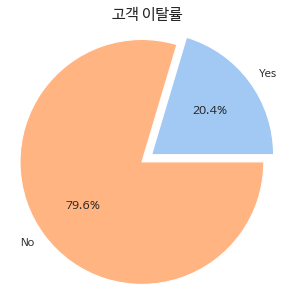

In [12]:
print(df['Exited'].value_counts())

fig, axs = plt.subplots(figsize=(5, 5))
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]

axs.pie(sizes, explode=(0, 0.1), labels=['Yes', 'No'], autopct='%1.1f%%')
axs.axis('equal')
plt.title("고객 이탈률", size = 15)
plt.show()

#이탈고객 : 7963명
#유지고객 : 2037명

### Gender

Male      5457
Female    4543
Name: Gender, dtype: int64


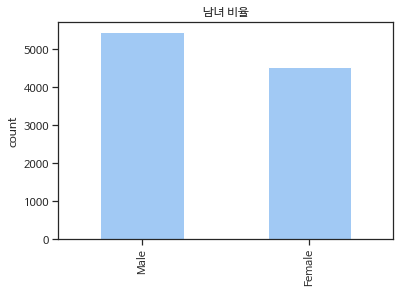

In [13]:
print(df['Gender'].value_counts())
df['Gender'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('남녀 비율')
plt.show()

#남 : 5457명
#여 : 4543명

In [14]:
gender_sum_by_ExitedYes = df[df['Exited'] == 1].groupby('Gender').Exited.count()
gender_sum_by_ExitedNo = df[df['Exited'] == 0].groupby('Gender').Exited.count()

print(gender_sum_by_ExitedYes)
print(gender_sum_by_ExitedNo)

Gender
Female    1139
Male       898
Name: Exited, dtype: int64
Gender
Female    3404
Male      4559
Name: Exited, dtype: int64


In [15]:
grades_order = ['Male','Female']
gender_sum_by_ExitedYes = gender_sum_by_ExitedYes.loc[grades_order]
gender_sum_by_ExitedNo = gender_sum_by_ExitedNo.loc[grades_order]

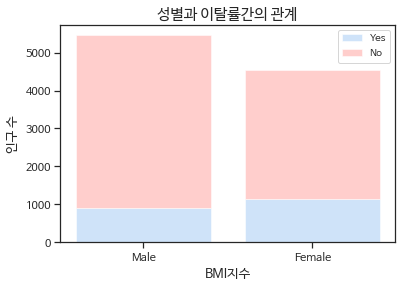

In [16]:
alpha = 0.5

p1 = plt.bar(grades_order, gender_sum_by_ExitedYes, color='b', alpha=alpha)
p2 = plt.bar(grades_order, gender_sum_by_ExitedNo, color='r', alpha=alpha,
             bottom=gender_sum_by_ExitedYes) # stacked bar chart


plt.title('성별과 이탈률간의 관계', fontsize=15)
plt.ylabel('인구 수', fontsize=13)
plt.xlabel('BMI지수', fontsize=13)
plt.legend((p1[0], p2[0]), ('Yes', 'No'), fontsize=10)
plt.show()

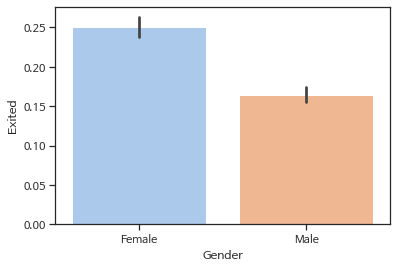

In [17]:
sns.barplot(
    data = df,
    x = "Gender",
    y = "Exited")
plt.show()

#여성의 가입자 이탈률이 더 높다

Male      5457
Female    4543
Name: Gender, dtype: int64
Male      0.5457
Female    0.4543
Name: Gender, dtype: float64


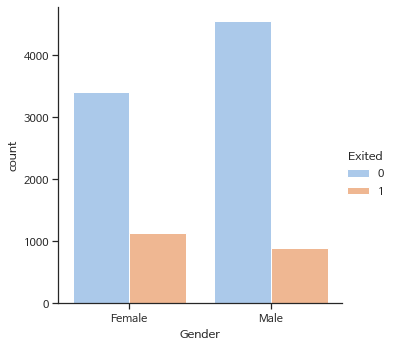

In [18]:
print(df.Gender.value_counts())
print(df.Gender.value_counts(normalize=True))
sns.catplot(kind='count', data=df, x='Gender', hue="Exited")

- 여성 고객의 이탈 비율이 남성 고객의 이탈 비율보다 크다.

### Age

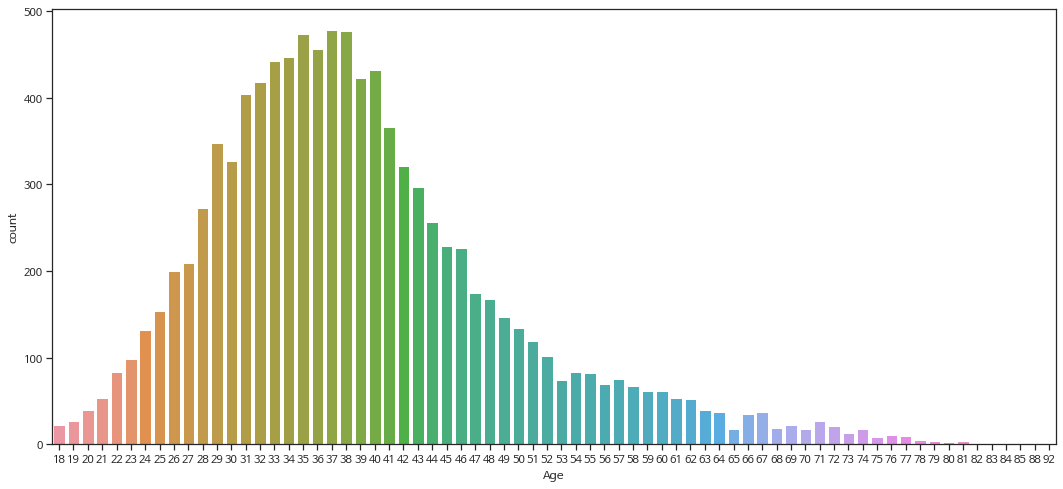

In [19]:
plt.figure(figsize=(18, 8))
sns.countplot(x=df.Age, data=df)

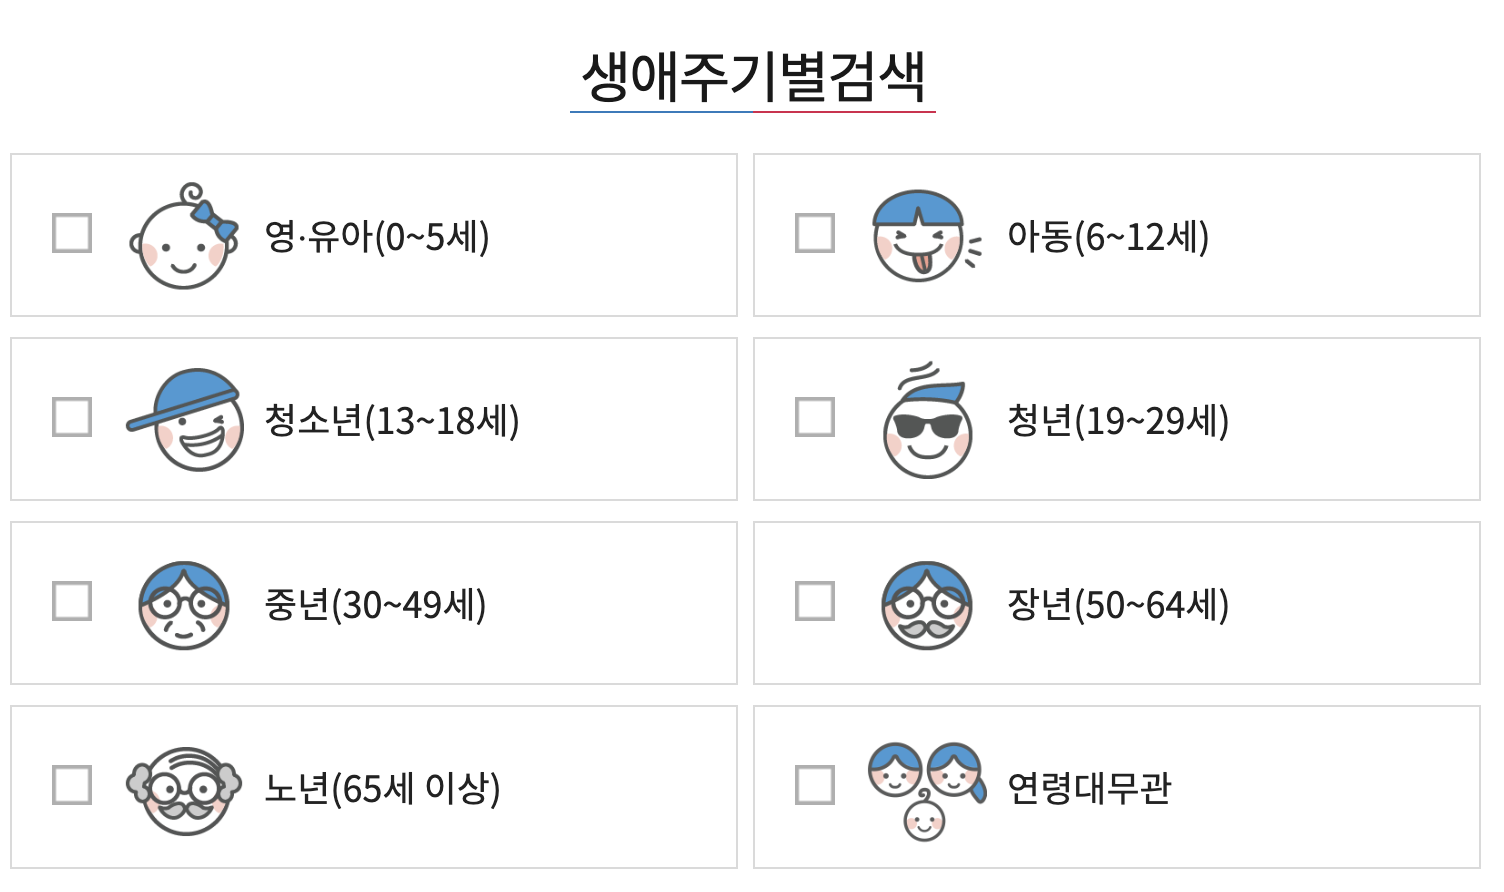

- https://www.gosims.go.kr/hh/hh001/retrieveLfcySearch.do

In [20]:
grades = []
for row in df['Age'] : 
  if row <= 29:
    grades.append('청년')
  elif row <= 49:
    grades.append('중년')
  elif row <= 64:
    grades.append('장년')
  else:
    grades.append('노년')

df['Ageband'] = grades

중년    6964
청년    1641
장년    1113
노년     282
Name: Ageband, dtype: int64


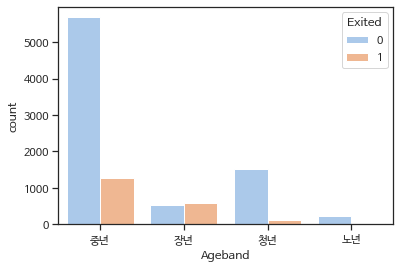

In [21]:
print(df['Ageband'].value_counts())
sns.countplot(x='Ageband', hue = 'Exited',data = df)

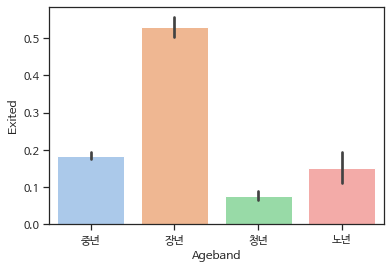

In [22]:
sns.barplot(
    data = df,
    x = "Ageband",
    y = "Exited")
plt.show()

- 중년의 가입비율이 매우 높은 편이다.
- 청년은 가입률에 비해 이탈률이 낮은 편이다.
- 장년은 이탈률이 매우 높다.

### Geography

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


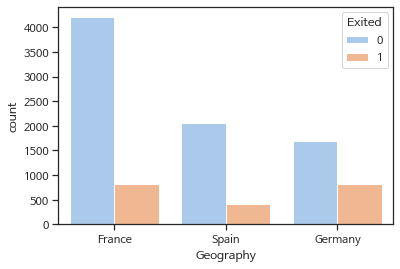

In [23]:
print(df['Geography'].value_counts())
sns.countplot(x='Geography', hue = 'Exited',data = df)

#프랑스 : 5014명
#독일 : 2509명
#스페인 : 2477명

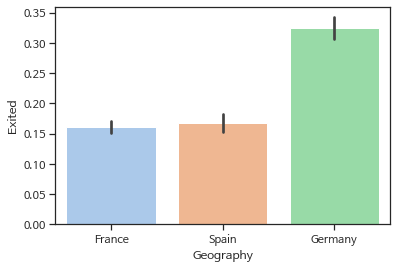

In [24]:
sns.barplot(
    data = df,
    x = "Geography",
    y = "Exited")
plt.show()

- 독일 > 스페인 > 프랑스 순으로 고객이탈률이 높다

### Balance 

In [25]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [26]:
#계좌잔액에 따른 이탈률을 알아보기 위해 'Balance_grades' 컬럼 추가
grades = []
for row in df['Balance'] : 
  if row <= 97198.540000:
    grades.append('Low')
  elif row <= 127644.240000:
    grades.append('High')
  else:
    grades.append('VeryHigh')

df['Balance_grades'] = grades

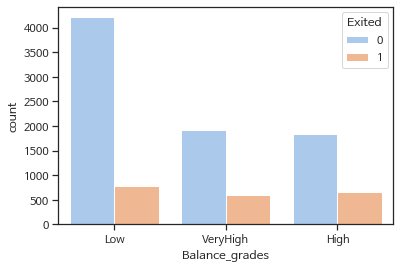

In [27]:
sns.countplot(x='Balance_grades', data=df, hue="Exited")

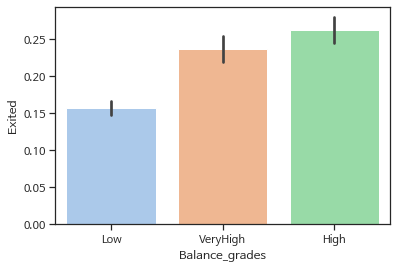

In [28]:
sns.barplot(
    data = df,
    x = "Balance_grades",
    y = "Exited")
plt.show()

- 계좌잔액이 많을 수록 이탈률이 높아지는 경향이 있음
- 계좌잔액이 많은 고객들은 자산을 활발하게 활

### Tenure

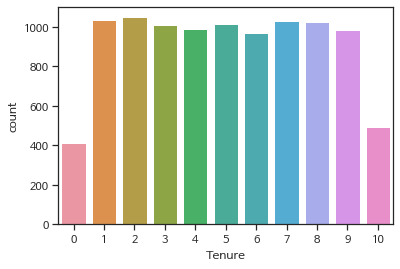

In [29]:
sns.countplot(x='Tenure', data=df)

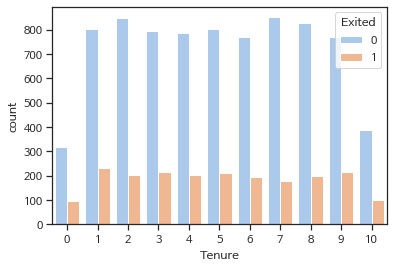

In [30]:
sns.countplot(x='Tenure', data=df, hue="Exited")

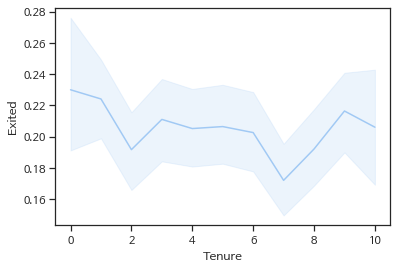

In [31]:
sns.lineplot(
    data = df,
    x = "Tenure",
    y = "Exited")
plt.show()

- 가입년수가 1년~7년까지는 가입년수가 증가할 수록 이탈률이 점점 줄어드는 경향이 있지만, 7년이 지나면서 다시 이탈률이 늘어나는 경향이 있다.

In [32]:
#신용점수에 따른 이탈률을 알아보기 위해 grades 열 추가
print(df['CreditScore'].describe()) 

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64


In [33]:
grades = []
for row in df['CreditScore'] : 
  if row <= 584:
    grades.append('Very Low')
  elif row <= 652:
    grades.append('Low')
  elif row <= 718:
    grades.append('High')
  else:
    grades.append('VeryHigh')

df['Credit_grades'] = grades

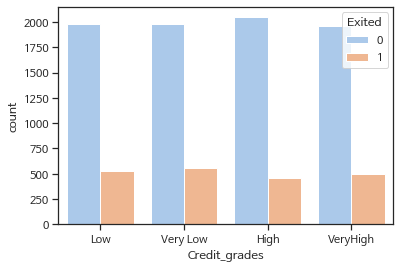

In [34]:
sns.countplot(x='Credit_grades', data=df, hue="Exited")

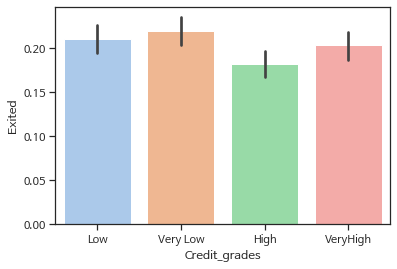

In [35]:
sns.barplot(
    data = df,
    x = "Credit_grades",
    y = "Exited")
plt.show()

- 신용점수는 고객 이탈률에 유의한 영향이 없음

### HasCrCard

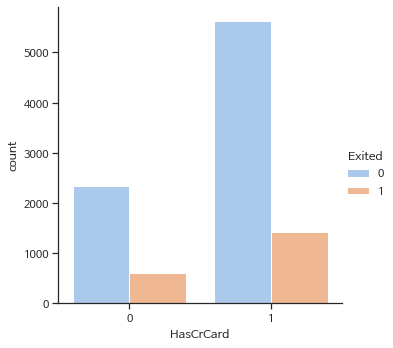

In [36]:
sns.catplot(kind='count', data=data, x='HasCrCard', hue="Exited")

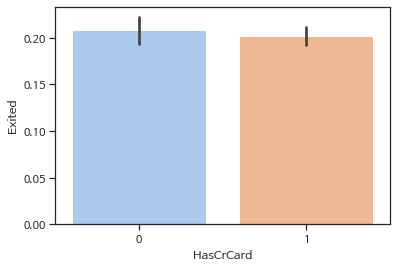

In [37]:
sns.barplot(
    data = df,
    x = "HasCrCard",
    y = "Exited")
plt.show()

- 신용카드 보유율은 고객 이탈률과 큰 연관성이 없음

### NumOfProducts

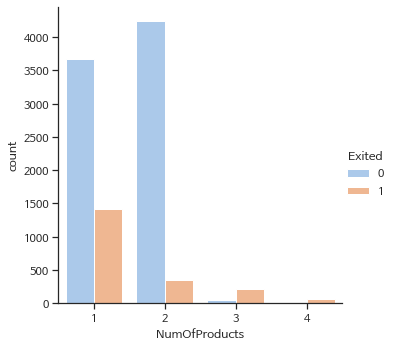

In [38]:
sns.catplot(kind='count', data=df, x='NumOfProducts', hue="Exited")

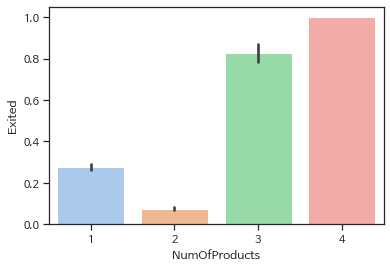

In [39]:
sns.barplot(
    data = df,
    x = "NumOfProducts",
    y = "Exited")
plt.show()

- 은행 계좌 및 제휴제품 수가 3개 이상이면 이탈률이 매우 높음

### IsActiveMember

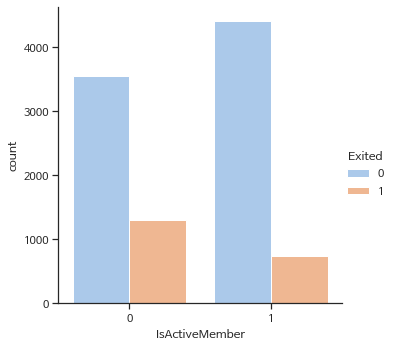

In [40]:
sns.catplot(kind='count', data=df, x='IsActiveMember', hue="Exited")

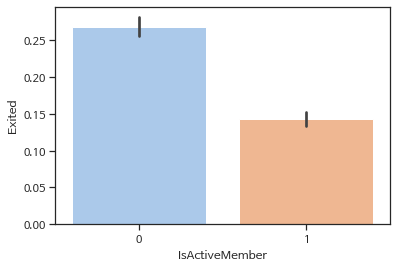

In [41]:
sns.barplot(
    data = df,
    x = "IsActiveMember",
    y = "Exited")
plt.show()

- 활성화가 되어있지 않은 고객들이 활성화 고객보다 더 높은 비율로 이탈한다.
- 활성화가 되어있지 않은 고객의 비율이 상당히 높다. 이는 고객 이탈에 영향을 미칠 것이기 때문에 은행은 이 그룹을 활성화 고객으로 전환시키기 위해 별도의 프로그램을 시행하는 등의 마케팅 전략을 세워야한다.

### EstimatedSalary

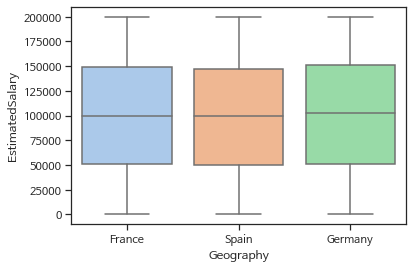

In [42]:
sns.boxplot(y='EstimatedSalary',x = 'Geography', data=df)

In [43]:
print(data.EstimatedSalary.describe())

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64


In [44]:
grades = []
for row in df['EstimatedSalary'] : 
  if row <= 51002.11:
    grades.append('Very Low')
  elif row <= 100193.915:
    grades.append('Low')
  elif row <= 149388.2475:
    grades.append('High')
  else:
    grades.append('VeryHigh')

df['Salary_grades'] = grades

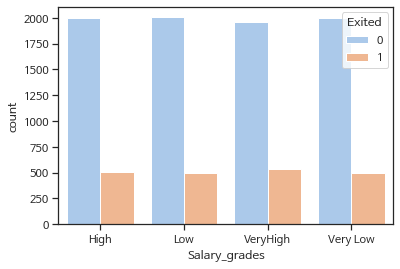

In [45]:
sns.countplot(x='Salary_grades', 
              data=df, hue="Exited")

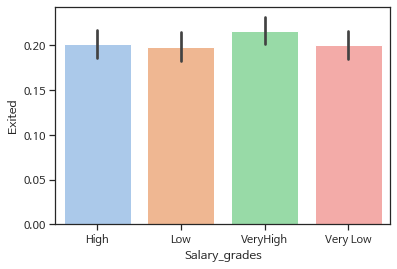

In [46]:
sns.barplot(
    data = df,
    x = "Salary_grades",
    y = "Exited")
plt.show()

- 나라별 연봉은 차이가 거의 없음
- 연봉은 고객이탈률과 큰 연관성이 없음

## 이탈률과 연관성이 있었던 컬럼 

1.   Gender
2.   Age (Ageband)
3. Geography
4. Tenure
5. NumOfProducts
6. IsActiveMember

Text(0.5, 0.98, '이탈률에 영향을 미치는 컬럼과의 관계 파악')

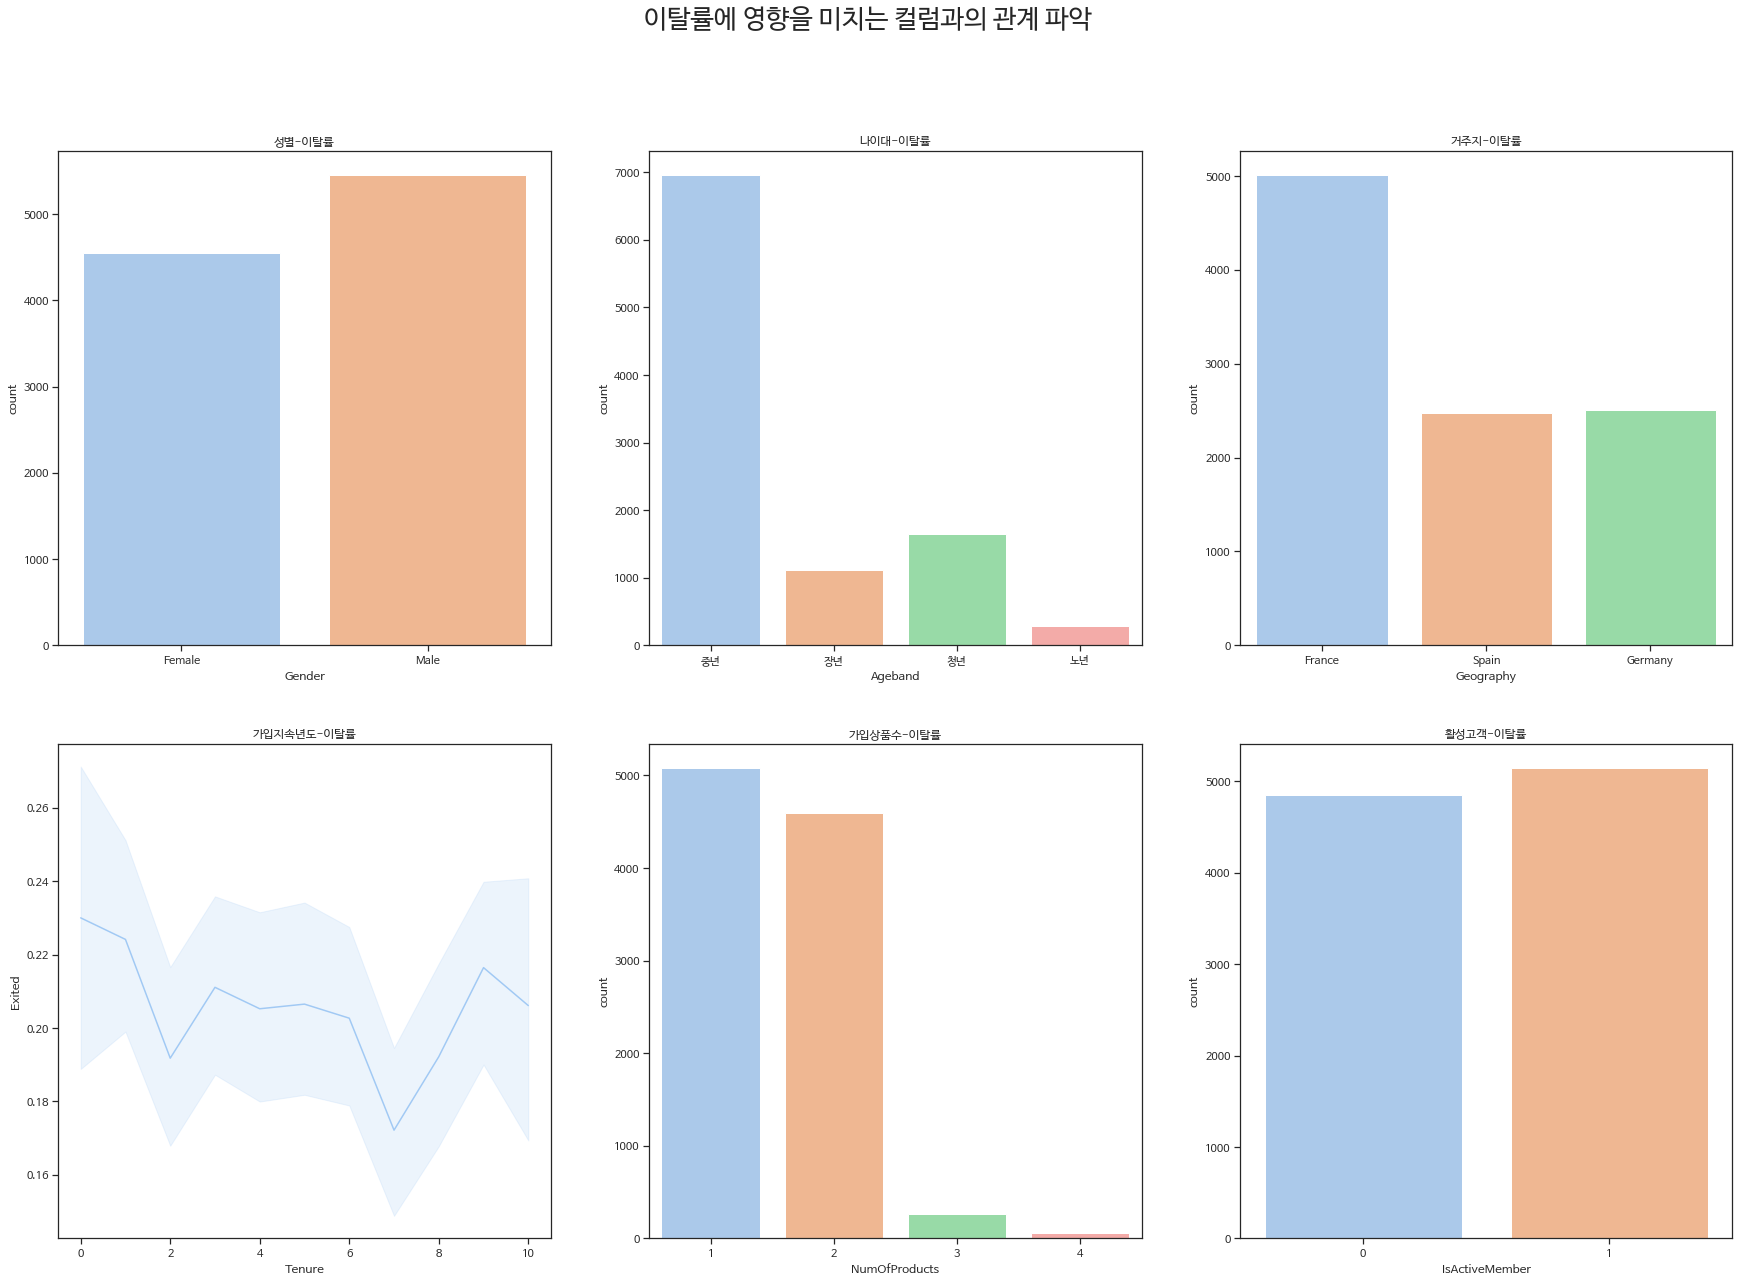

In [47]:
#연관성이 있는 그래프 하나로 모아서 보기

fig, ax = plt.subplots(ncols=3, nrows=2,figsize=(30,20))

sns.countplot(data=df, x='Gender', ax=ax[0,0])
ax[0, 0].set_title("성별-이탈률")

sns.countplot(data=df, x='Ageband', ax=ax[0,1])
ax[0, 1].set_title("나이대-이탈률")

sns.countplot(data=df, x='Geography',ax=ax[0,2])
ax[0, 2].set_title("거주지-이탈률")

sns.lineplot(data = df,x = "Tenure",y = "Exited",ax=ax[1,0])
ax[1, 0].set_title("가입지속년도-이탈률")

sns.countplot(data=df, x='NumOfProducts', ax=ax[1,1])
ax[1, 1].set_title("가입상품수-이탈률")

sns.countplot(data=df, x='IsActiveMember',ax=ax[1,2])
ax[1, 2].set_title("활성고객-이탈률")

fig.suptitle('이탈률에 영향을 미치는 컬럼과의 관계 파악', fontsize=26)

TypeError: ignored

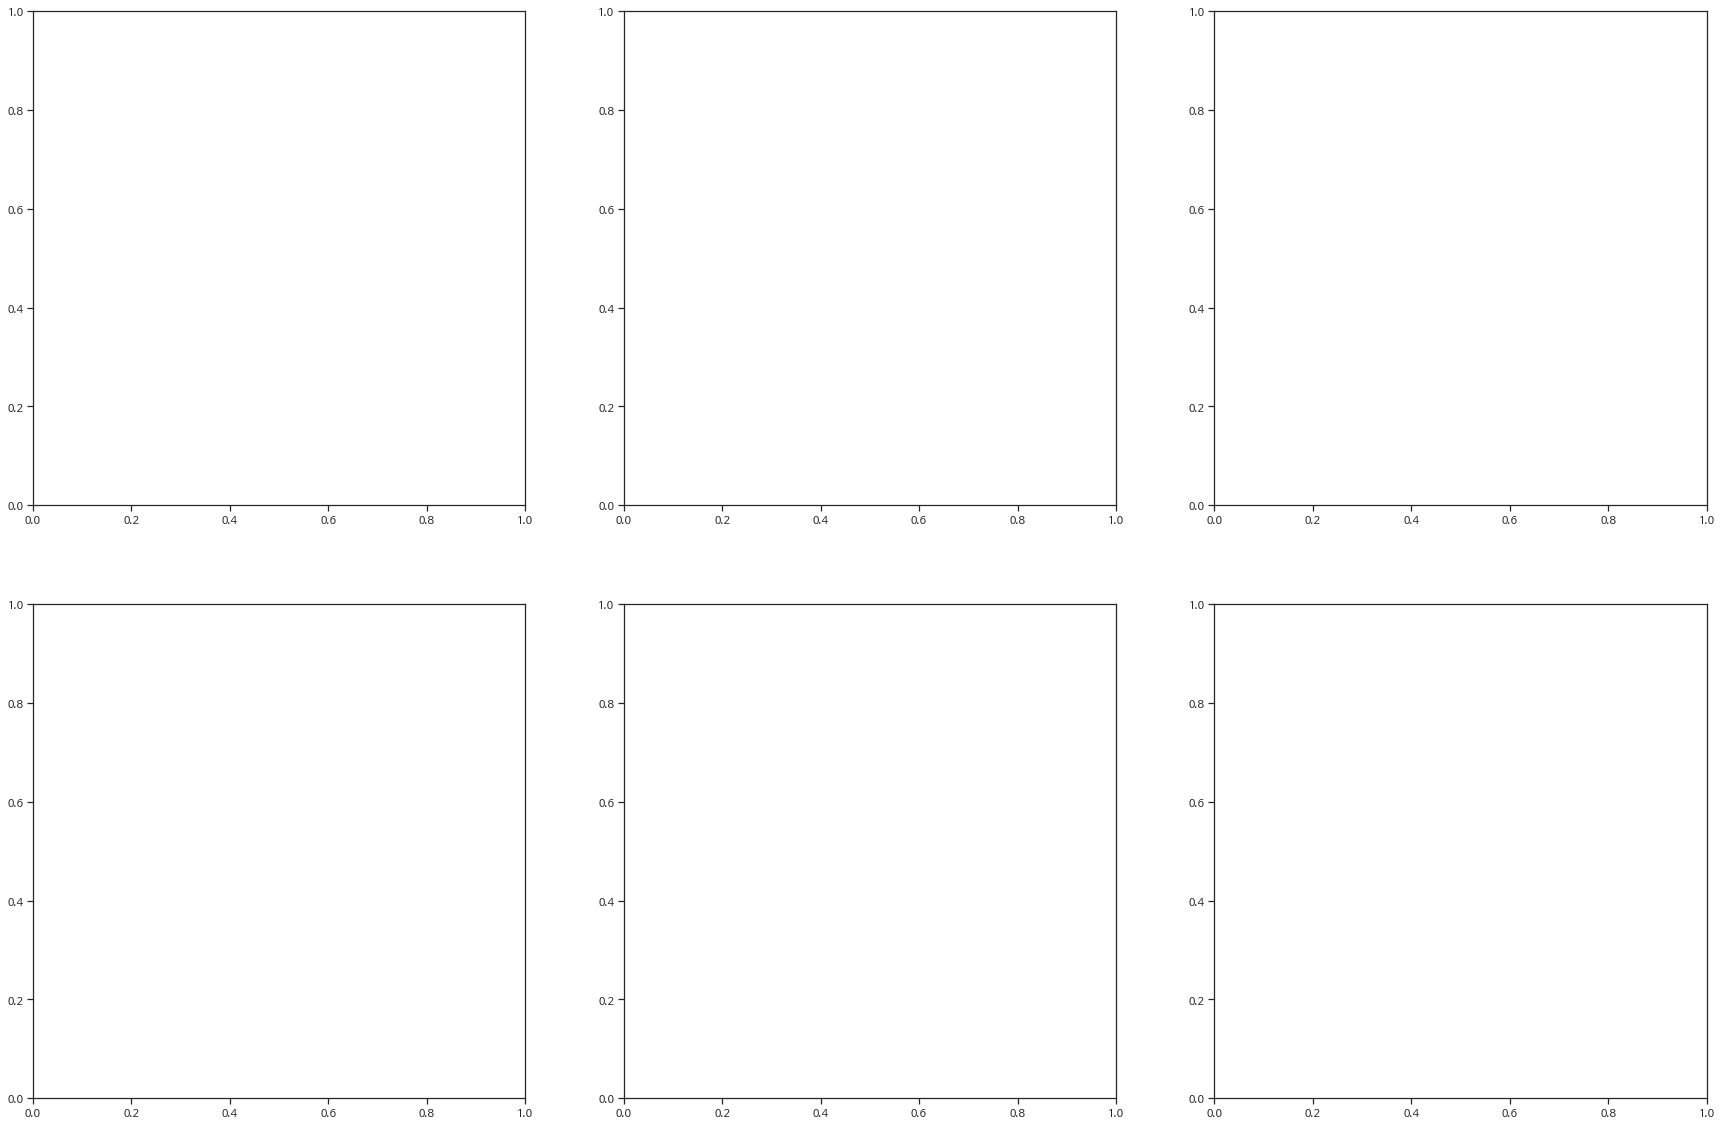

In [48]:
#연관성이 있는 그래프 하나로 모아서 보기

fig, ax = plt.subplots(ncols=3, nrows=2,figsize=(30,20))

sns.barplot(data=df, x='Gender', hue="Exited", ax=ax[0,0])
ax[0, 0].set_title("성별-이탈률")

sns.barplot(data = df, x = "Ageband",y = "Exited", ax=ax[0,1])
ax[0, 1].set_title("나이대-이탈률")

sns.barplot(data=df, x='Geography', hue="Exited", ax=ax[0,2])
ax[0, 2].set_title("거주지-이탈률")

sns.lineplot(data = df,x = "Tenure",y = "Exited",ax=ax[1,0])
ax[1, 0].set_title("가입지속년도-이탈률")

sns.barplot(data=df, x='NumOfProducts', hue="Exited", ax=ax[1,1])
ax[1, 1].set_title("가입상품수-이탈률")

sns.barplot(data=df, x='IsActiveMember', hue="Exited", ax=ax[1,2])
ax[1, 2].set_title("활성고객-이탈률")

fig.suptitle('이탈률에 영향을 미치는 컬럼과의 관계 파악', fontsize=26)

In [ ]:
df

In [ ]:
#문자형 변수 추출
s = (df2.dtypes == 'object')
object_cols = list(s[s].index)

print("문자형인 변수가 있는 컬럼:", object_cols)

In [ ]:
#라벨인코딩 실행
LE=LabelEncoder()

for i in object_cols:
    df2[i]=df2[[i]].apply(LE.fit_transform)
    
print("모든 변수가 숫자형입니다!")

In [ ]:
df

In [ ]:
df2

In [ ]:
#heatmap으로 상관관계를 표시
plt.rcParams["figure.figsize"] = (20,20)
sns.heatmap(df2.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )